In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/clean_psyphysical_main3_debrief.csv")

df_2 = pd.read_csv("../../data/clean_psyphysical_main2_debrief.csv")
df_2_3 = pd.concat([df_2, df])

#Create unique players
df["player_nb"] = "p" + df["player"].astype(str)
df["player"] = df["player"].astype(str)
df["player"] = df["player"] + df["participant_code"]

df_2_3 ["player_nb"] = "p" + df_2_3 ["player"].astype(str)
df_2_3 ["player"] = df_2_3 ["player"].astype(str)
df_2_3 ["player"] = df_2_3 ["player"] + df_2_3["participant_code"]

#Combine session code with mastok session
df["mk_session"] = df["mk_session"].replace('mk:psyphysical_main:', 'mk_', regex=True)
df["mk_session"] = df["mk_session"] + "_" + df["session_code"]

#Combine session code with mastok session
df_2_3 ["mk_session"] = df_2_3["mk_session"].replace('mk:psyphysical_main:', 'mk_', regex=True)
df_2_3 ["mk_session"] = df_2_3["mk_session"] + "_" + df_2_3["session_code"]

#### Dominance measure pilot 3

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12652\1279285681.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.catplot(x="player", y="value", hue="variable", data=melted_dominance_measuire,


<Figure size 1000x600 with 0 Axes>

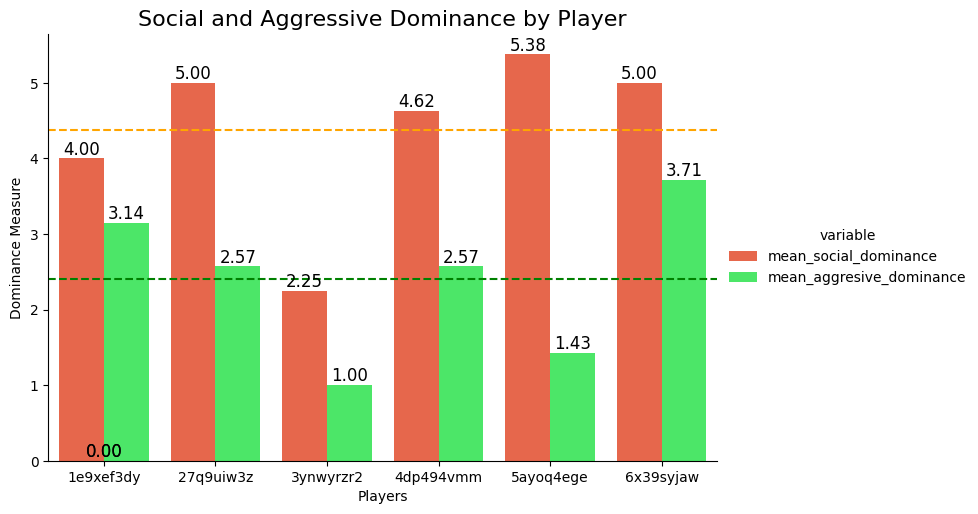

In [2]:
melted_dominance_measuire = pd.melt(df, id_vars=["player"], value_vars=["mean_social_dominance", "mean_aggresive_dominance"])

custom_palette = ['#FF5733', '#33FF57', '#3357FF']

plt.figure(figsize=(10, 6))

# Create the catplot
plot = sns.catplot(x="player", y="value", hue="variable", data=melted_dominance_measuire, 
                   kind="bar", aspect=1.5, palette=custom_palette)

# Add titles and labels
plot.set_axis_labels("Players", "Dominance Measure")
plt.title("Social and Aggressive Dominance by Player", fontsize=16)

# Add horizontal lines for global means
social_mean = 4.375
aggressive_mean = 2.404761904761905
for ax in plot.axes.flat:
    ax.axhline(y=social_mean, color='orange', linestyle='--', label='Global Mean Social Dominance')
    ax.axhline(y=aggressive_mean, color='green', linestyle='--', label='Global Mean Aggressive Dominance')

# Add value annotations
for ax in plot.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12)


## Sound quality for pilot 2 and 3

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12652\3043616735.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.catplot(x="player", y="Likert score", hue="Sound Evaluation",


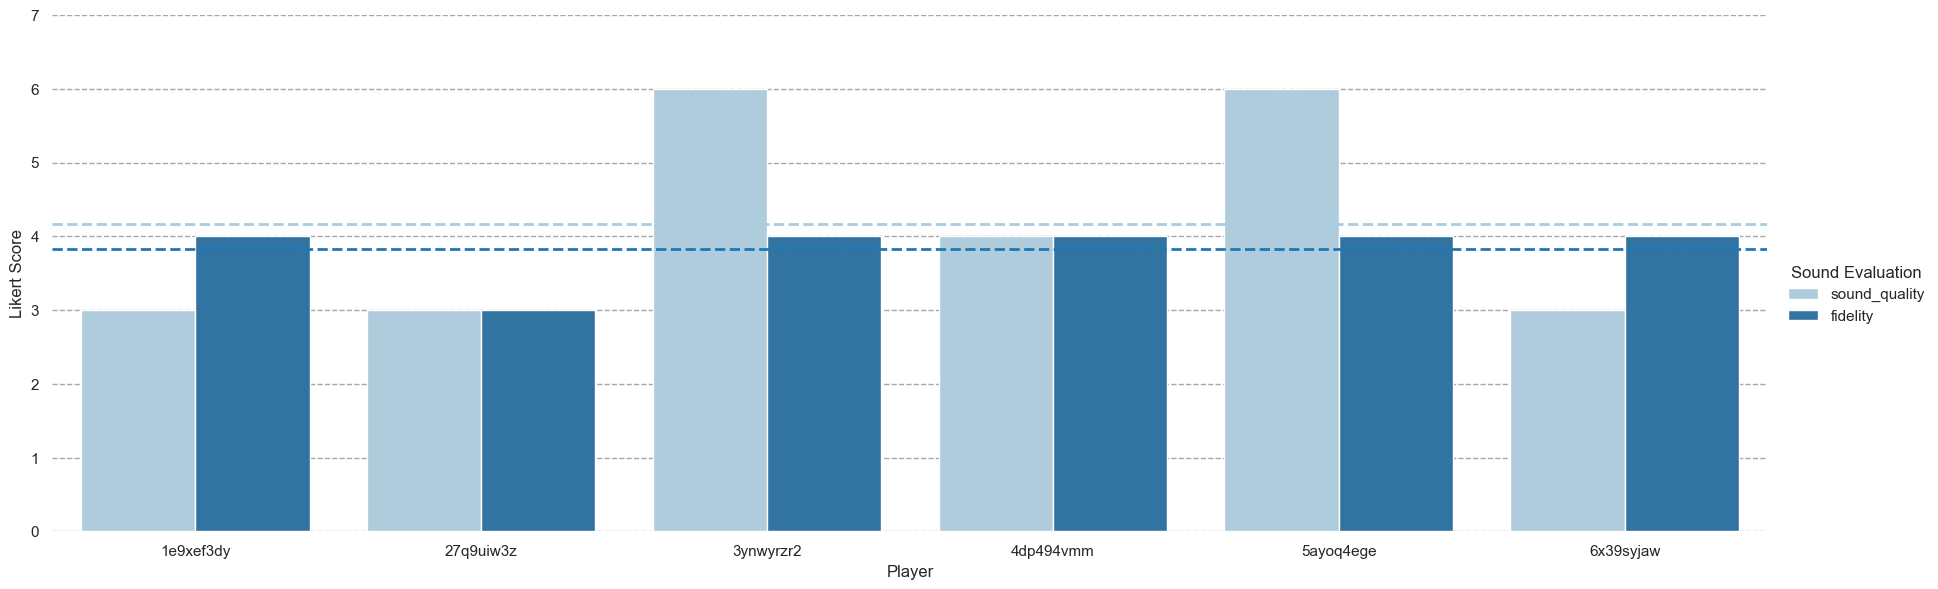

In [4]:
# Evaluate the quality of the sound during the conversations you had, comparing it to what you are 
# used to with other services like Skype or Zoom. Poor sound quality could be noisy, interrupted, distorted, or hard to understand.
df_2_3 = df_2_3.loc[df_2_3["mk_session"] == "mk_3_rix3vv3s"]

melted_dominance_measuire = pd.melt(df_2_3, id_vars=["player"], value_vars=["sound_quality", "fidelity"],
                                   var_name="Sound Evaluation", 
                                   value_name="Likert score")
# Set style for the plot
sns.set(style="whitegrid")

# Custom palette for the bars and lines
custom_palette = {"sound_quality": "orange", "fidelity": "green"}

# Create the bar plot with adjustments for bar width and spacing
plot = sns.catplot(x="player", y="Likert score", hue="Sound Evaluation", 
                   data=melted_dominance_measuire, kind="bar", aspect=3, 
                   palette="Paired", ci=None, height=6)

# Customize plot elements
plot.set_axis_labels("Player", "Likert Score")  # Add axis labels
plot.set_titles("Sound Evaluation by Player")   # Add plot title

# Calculate means for sound_quality and fidelity
sound_quality_mean = df["sound_quality"].mean()
fidelity_mean = df["fidelity"].mean()

paired_palette = sns.color_palette("Paired", 2)

for ax in plot.axes.flat:
    ax.axhline(y=sound_quality_mean, color=paired_palette[0],  # First color for sound_quality
               linestyle='--', linewidth=2, label='Global Mean Social Dominance')
    ax.axhline(y=fidelity_mean, color=paired_palette[1],  # Second color for fidelity
               linestyle='--', linewidth=2, label='Global Mean Aggressive Dominance')

    ax.set_ylim(0, 7)  # Set y-axis limit
    ax.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.7)  # Add gridlines for readability

# Remove unnecessary spines to declutter the plot
sns.despine(left=True, bottom=True)

In [4]:
df_2_3["sound_comment"]

0    One participant did not speak, or i only heard...
1    Some participants were not so loud, some were ...
2                                        bit of static
3    Backgroun noise, Conversations in one from som...
4                  some people didn't have mic working
5    Sometimes it was very faint / I didn't hear an...
0    All participants were clear apart from one, wh...
1    I think the sound broke up a little bit with o...
2    Some low volume and a tiny bit of distortion b...
3    I thought everyone I spoke to sounded rather c...
4    Overall the sound quality of the speakers was ...
5                             some people were lagging
Name: sound_comment, dtype: object

### Unique Interactions

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12652\2564671235.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(x="player", y="unique_interactions", data=df_2_3, kind="bar",
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12652\2564671235.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.catplot(x="player", y="unique_interactions", data=df_2_3, kind="bar",
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12652\2564671235.py:12: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  plot = sns.catplot(x="player", y="unique_interactions", data=df_2_3, kind="bar",


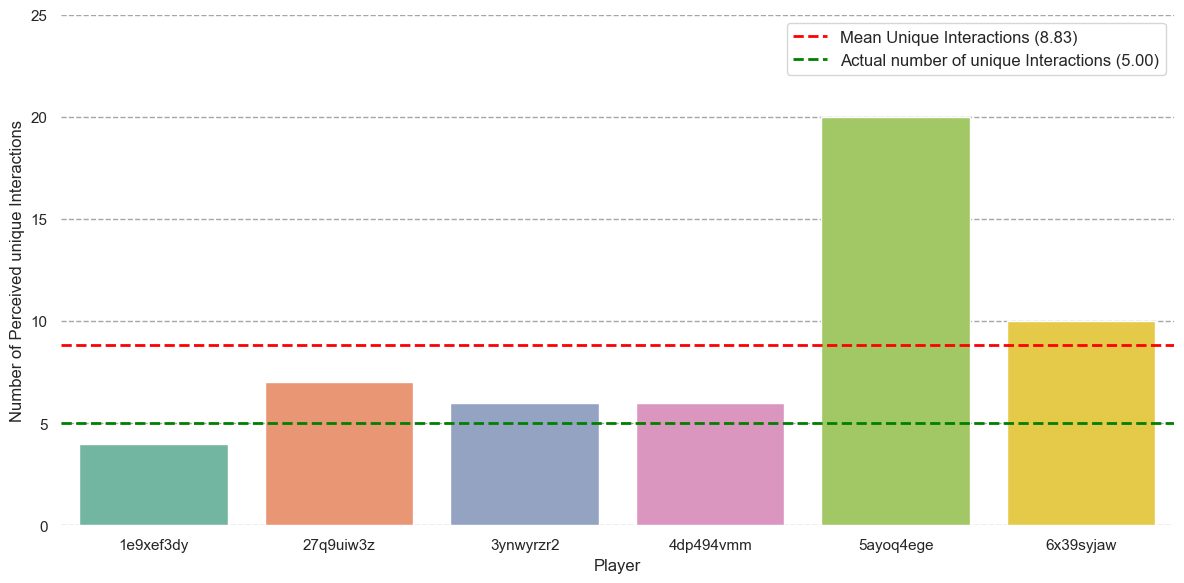

In [6]:


custom_palette = {"sound_quality": "orange", "fidelity": "green", "unique_interactions": "blue"}

# Set plot style for a cleaner look
sns.set(style="whitegrid")

# Custom palette (or use a predefined palette like "Set2", "Paired", etc.)
custom_palette = sns.color_palette("Set2")

df_2_3 = df_2_3.loc[df_2_3["mk_session"] == "mk_3_rix3vv3s"]

# Create the bar plot
plot = sns.catplot(x="player", y="unique_interactions", data=df_2_3, kind="bar", 
                   aspect=2, palette=custom_palette, height=6, ci=None)

# Add plot title and axis labels
plot.set_axis_labels("Player", "Number of Perceived unique Interactions")
plot.set_titles("Unique Interactions by Player")

# Calculate the mean of unique_interactions for the dataset
mean = df_2_3["unique_interactions"].mean()

# Add a horizontal line at the mean with a corresponding color and label
for ax in plot.axes.flat:
    ax.axhline(y=mean, color='red', linestyle='--', linewidth=2, 
               label=f'Mean Unique Interactions ({mean:.2f})')
    ax.axhline(y=5, color='green', linestyle='--', linewidth=2, 
               label=f'Actual number of unique Interactions ({5:.2f})')

    # Set y-axis limits and enable gridlines for clarity
    ax.set_ylim(0, df_2_3["unique_interactions"].max() + 5)
    ax.grid(True, which='major', axis='y', linestyle='--', color='gray', alpha=0.7)

# Customize the legend (placing it inside the plot or outside)
ax.legend(loc='upper right', title='', fontsize='medium', title_fontsize='medium')

# Remove unnecessary spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout to prevent label overlap
plt.tight_layout()
